In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets.mnist import load_data

In [3]:
(x_train, y_train), (x_test, y_test) = load_data()

In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


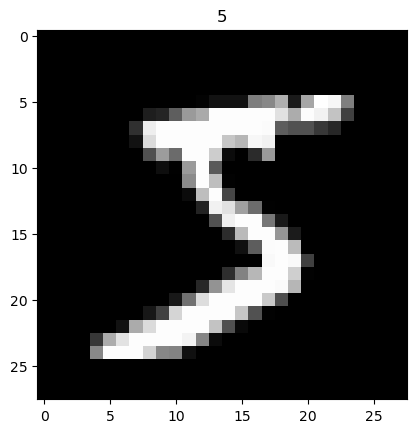

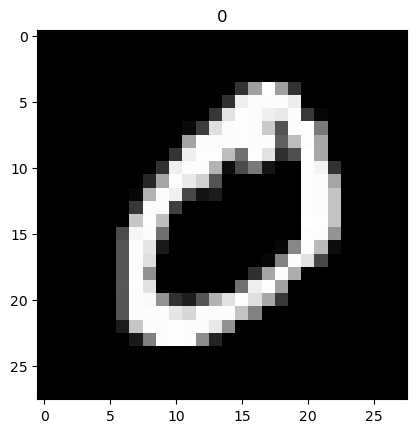

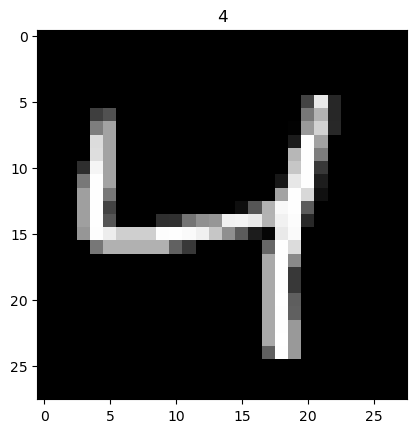

In [5]:
for i in range(3):                        # loops over the first 3 images in the dataset.
    plt.imshow(x_train[i], cmap = 'gray') # the image at index i in the training set.
    plt.title(y_train[i])                 # Sets the title corresponding to the image.
    plt.show()

The train dataset is present in (60000, 28, 28) shape. This has to be converted into unidirection format to pass it into a Neural 
Network

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_train = x_train.reshape(-1,784) # basic feedforward neural networks (Dense layers in Keras/TensorFlow) require 
                                  # input as flat vectors, not matrices.

In [8]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
x_test = x_test.reshape(-1,784)

In [10]:
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [12]:
from tensorflow.keras.utils import to_categorical # performs one-hot encoding for the categorical values

In [13]:
to_categorical(y_train)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [14]:
to_categorical(y_train).shape

(60000, 10)

In [15]:
x_train = x_train.reshape(-1,784) # divide by 255 to scale it
x_test = x_test.reshape(-1,784)  # # divide by 255 to scale it
y_train_ohe = to_categorical(y_train) # Not changing since it is ohe representation
y_test_ohe = to_categorical(y_test)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, Adagrad
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.layers import BatchNormalization

In [18]:
model = Sequential()
model.add(Input(shape=(784,)))
# model.add(Dropout(0.1))
# model.add((Dense(units = 20, activation = 'relu')) use this for scaled values of x without regularizers
# model.add(BatchNormalization())
model.add(Dense(units = 20, activation = 'relu', kernel_regularizer = L1L2(l1 = 0, l2 = 0.1)))
model.add(Dense(units = 10, activation = 'Softmax'))

In [19]:
model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics = ['Accuracy'])

In [20]:
model.fit(x_train, y_train_ohe, epochs = 100, validation_data=(x_test, y_test_ohe), batch_size=1000)

Epoch 1/100
60/60 [==============================] - 1s 9ms/step - loss: 20.8037 - Accuracy: 0.2492 - val_loss: 4.8328 - val_Accuracy: 0.2420
Epoch 2/100
60/60 [==============================] - 0s 7ms/step - loss: 4.4387 - Accuracy: 0.2787 - val_loss: 4.1506 - val_Accuracy: 0.3024
Epoch 3/100
60/60 [==============================] - 0s 7ms/step - loss: 3.9149 - Accuracy: 0.3255 - val_loss: 3.7540 - val_Accuracy: 0.3395
Epoch 4/100
60/60 [==============================] - 0s 7ms/step - loss: 3.5342 - Accuracy: 0.3597 - val_loss: 3.3857 - val_Accuracy: 0.4126
Epoch 5/100
60/60 [==============================] - 0s 6ms/step - loss: 3.1444 - Accuracy: 0.4884 - val_loss: 3.0287 - val_Accuracy: 0.5280
Epoch 6/100
60/60 [==============================] - 0s 7ms/step - loss: 2.8170 - Accuracy: 0.5513 - val_loss: 2.7247 - val_Accuracy: 0.5959
Epoch 7/100
60/60 [==============================] - 0s 7ms/step - loss: 2.5452 - Accuracy: 0.6000 - val_loss: 2.4584 - val_Accuracy: 0.6349
Epoch 8/100


In [21]:
model.history.history.keys()

dict_keys(['loss', 'Accuracy', 'val_loss', 'val_Accuracy'])

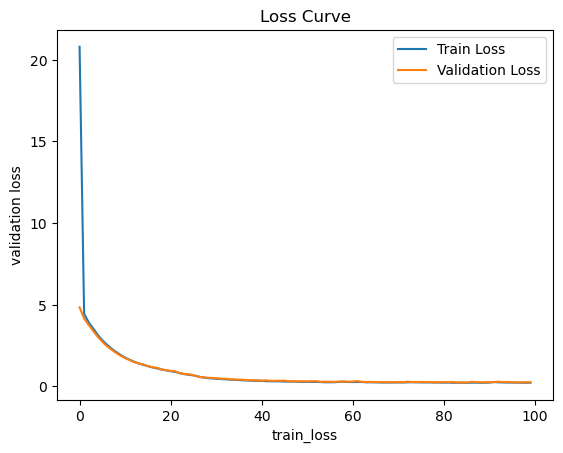

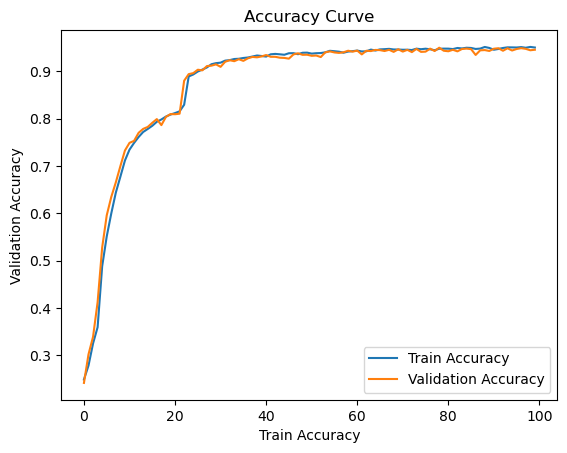

In [22]:
train_loss = model.history.history['loss']
validation_loss = model.history.history['val_loss']
train_accuracy = model.history.history['Accuracy']
validation_accuracy = model.history.history['val_Accuracy']

plt.plot(train_loss, label = 'Train Loss')
plt.plot(validation_loss, label = 'Validation Loss')
plt.xlabel('train_loss')
plt.ylabel('validation loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

plt.plot(train_accuracy, label = 'Train Accuracy')
plt.plot(validation_accuracy, label = 'Validation Accuracy')
plt.xlabel('Train Accuracy')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

In [23]:
prediction = model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


In [24]:
prediction.shape

(10000, 10)

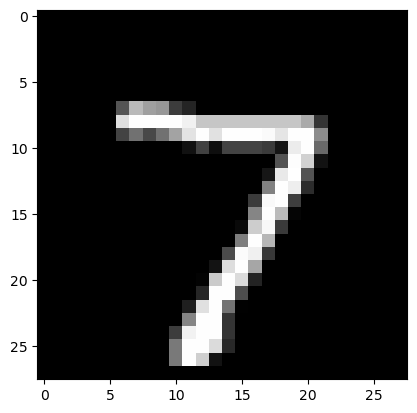

In [25]:
plt.imshow(x_test.reshape(-1,28,28)[0],cmap = 'gray')
plt.show()


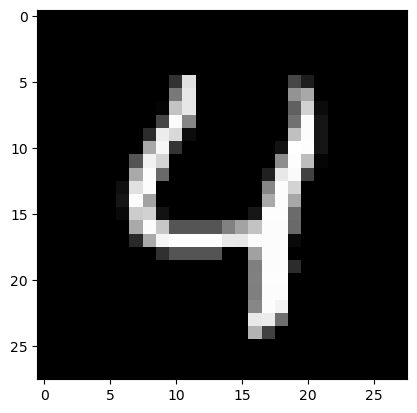

In [26]:
plt.imshow(x_test.reshape(-1,28,28)[4], cmap = 'gray')
plt.show()

In [27]:
np.argmax(prediction[0])

7

In [28]:
prediction_class = np.argmax(prediction, axis = 1) # For multi-class classification

In [29]:
prediction_class

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [30]:
pred = np.random.uniform(0,1,100)
np.where(pred>0.5,1,0) # Converting probability distribution into 2 separate categories using threshold
# For binary class classification

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1])

In [31]:
from sklearn.metrics import *

In [32]:
cf = confusion_matrix(y_test, prediction_class)
cf

array([[ 965,    0,    0,    3,    1,    2,    6,    1,    1,    1],
       [   0, 1120,    3,    2,    1,    1,    4,    1,    3,    0],
       [   6,    4,  959,   27,   10,    0,    5,   13,    8,    0],
       [   3,    6,   19,  946,    2,   21,    1,    4,    5,    3],
       [   2,    0,    3,    0,  942,    0,    6,    3,    2,   24],
       [   2,    1,    2,   21,    2,  829,   24,    1,    6,    4],
       [   8,    3,    0,    0,    9,    9,  927,    0,    2,    0],
       [   1,   14,   10,    9,    5,    2,    1,  955,    1,   30],
       [  12,    4,    7,   30,    9,   13,   12,    3,  867,   17],
       [   5,    4,    0,   18,   21,    5,    0,    7,    1,  948]],
      dtype=int64)

In [33]:
pd.DataFrame({'Actuals':y_test, 'Predicted':prediction_class})

,Actuals,Predicted
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
Total params: 15910 (62.15 KB)
Trainable params: 15910 (62.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
